In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the iris dataset
iris = sns.load_dataset('iris')

# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


<Figure size 350x350 with 0 Axes>

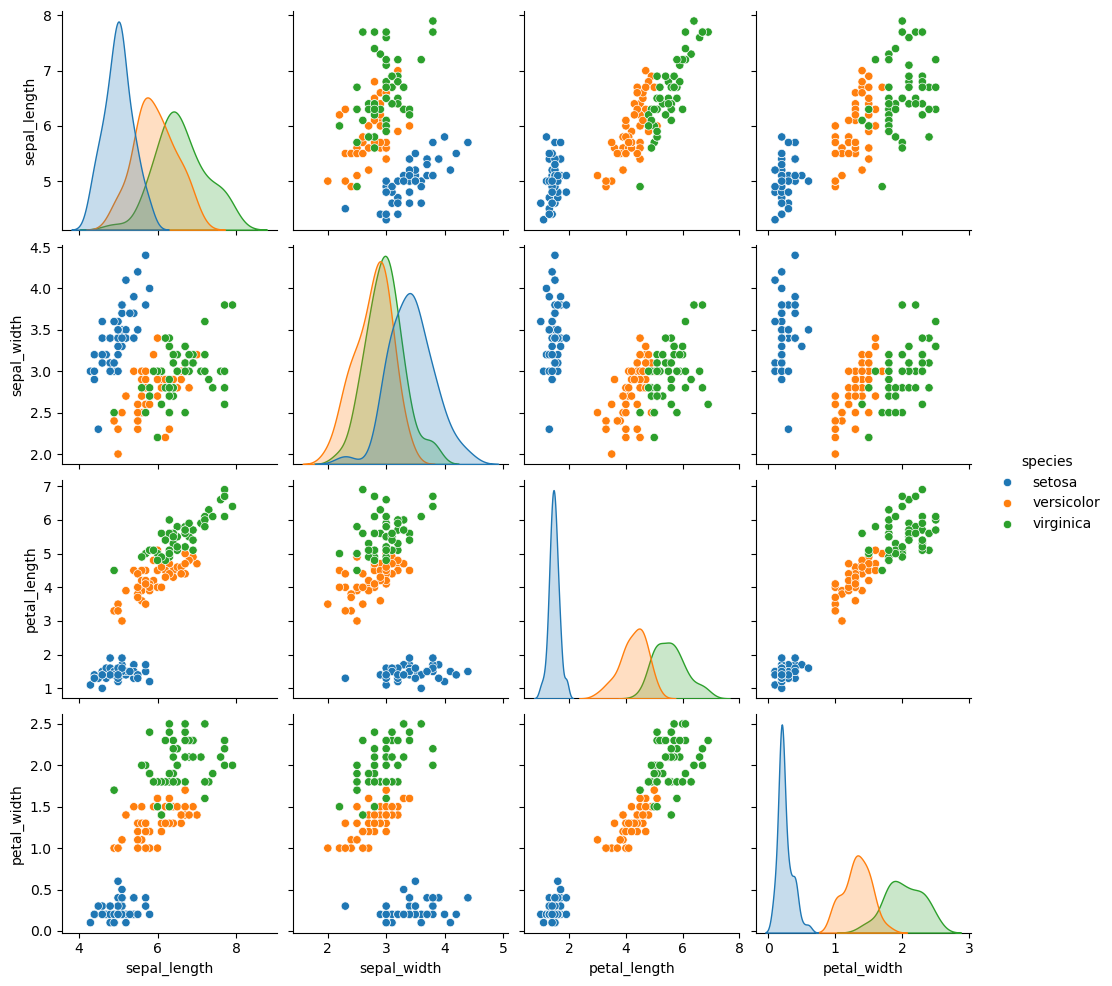

In [4]:
plt.figure(figsize=(3.5,3.5))
sns.pairplot(iris,hue='species')
plt.show()

## Iris

In [5]:
import math

In [6]:
def calc_mean(values: list):
    return sum(values)/len(values)

def calc_variance(values: list):
    _mean = sum(values)/len(values)
    return sum([(value-_mean)**2 for value in values]) / (len(values)-1)

In [7]:
math.isclose(calc_mean(iris['petal_length']), iris['petal_length'].mean())

True

In [8]:
math.isclose(calc_variance(iris['petal_length']) , iris['petal_length'].var())

True

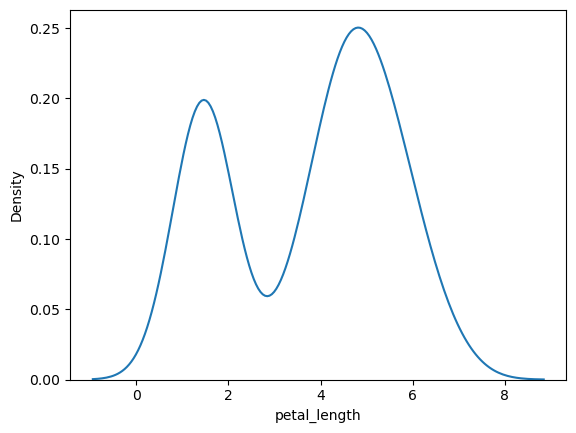

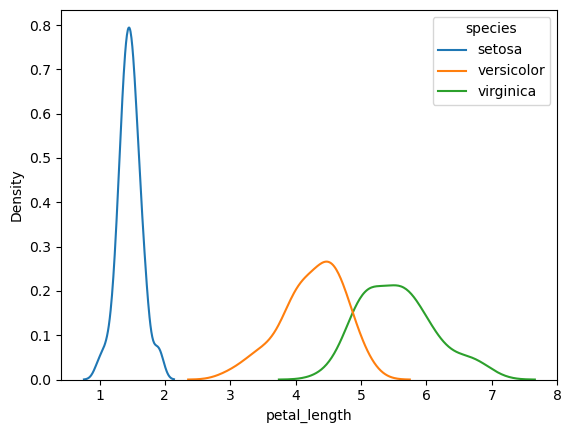

In [9]:
sns.kdeplot(data=iris,x='petal_length');
plt.show()
sns.kdeplot(data=iris,x='petal_length',hue='species');
plt.show()

In [10]:
# Extract the sepal length data
petal_length = iris['petal_length']

# Calculate sample statistics
sample_mean = np.mean(petal_length)
sample_variance = petal_length.var(ddof=0)
sample_sd = np.sqrt(sample_variance)
n = len(petal_length)

n, sample_mean, sample_variance, sample_sd


(150, 3.7580000000000005, 3.0955026666666665, 1.759404065775303)

In [11]:
### Standard error

standard_error_mean = sample_sd/np.sqrt(n)
standard_error_mean

0.1436547404175875

(-0.35, 0.35)

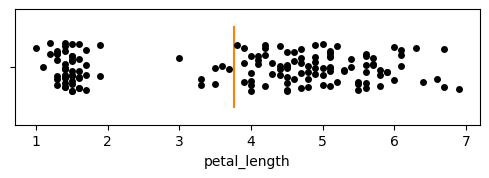

In [12]:
plt.figure(figsize=(6,1.5))
sns.stripplot(x=petal_length,color='black',jitter=0.15)
plt.vlines(x=sample_mean,ymin=-0.25,ymax=0.25,color=sns.color_palette()[1],zorder=-1)
plt.ylim(-.35,0.35)

In [13]:
import scipy.stats as stats

In [14]:
# Critical value for a confidence interval from a t distribution: a function of the selected alpha
alpha = 0.05
df = n - 1
t_crit = stats.t.ppf(1 - alpha/2, df)
t_crit

1.976013177679155

In [15]:
# confidence interval

ci_lower = sample_mean - (t_crit * standard_error_mean)
ci_upper = sample_mean + (t_crit * standard_error_mean)
ci_lower, ci_upper

(3.4741363398987692, 4.041863660101232)

We can also obtain this directly by passin the `petal_length` values to `statsmodels`

In [16]:
import statsmodels.stats.weightstats as smw

In [17]:
descr_stats = smw.DescrStatsW(petal_length)
descr_stats.tconfint_mean(alpha=0.05)

(3.4731853701995115, 4.042814629800491)

__Confidence Interval (CI)__

> When we calculate a 95% confidence interval for the mean petal length, we are saying that if we were to take many random samples from the population of irises and calculate the confidence interval for each sample, approximately 95% of those confidence intervals would contain the true population mean ($\mu$). <br>
> The specific confidence interval we calculated, (3.473, 4.043), is just one of those intervals.

<br>
<br>

Since our sample mean of 3.758 falls within the calculated confidence interval, it suggests that our sample mean is a plausible estimate of the population mean. 

-----

In [30]:
p_0 = stats.t.pdf(0,df=df)
p_crit = stats.t.pdf(t_crit,df=df)
p_crit

0.05722742643168594

Text(-1.976013177679155, 0.08222742643168594, '0.057')

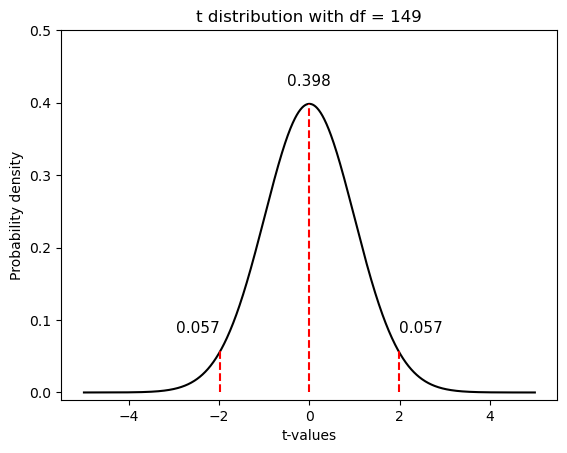

In [31]:
x = np.arange(-5, 5.01, 0.01)
yy = stats.t.pdf(x, df=df)

plt.title(f't distribution with df = {df}')
sns.lineplot(x=x,y=yy,color='black')

plt.ylim(-0.01, 0.5)
plt.xlabel('t-values')
plt.ylabel('Probability density')

plt.vlines(x=t_crit, ymin=0, ymax=p_crit, color="red", linestyle="--")
plt.text(t_crit, p_crit + 0.025, f"{np.round(p_crit,3)}", fontsize=11,ha='left')


plt.vlines(x=0, ymin=0, ymax=p_0, color="red", linestyle="--")
plt.text(0, p_0 + 0.025, f"{np.round(p_0,3)}", fontsize=11,ha='center')

plt.vlines(x=-t_crit, ymin=0, ymax=p_crit, color="red", linestyle="--")
plt.text(-t_crit, p_crit + 0.025, f"{np.round(p_crit,3)}", fontsize=11,ha='right')


# xpos = [-4, -2, 0, 2, 4]
# ypos = [0.005, 0.065, round(max(yy), 3), 0.065, 0.005]

# for px in xpos:

#     prob = stats.t.pdf([px],df=df)
#     ypos = np.round(prob,4)
#     plt.vlines(x=px, ymin=0, ymax=ypos,
#                color="red", linestyle="--")
    
#     if px < 0:
#         ha = 'right'
#         adj = +0.2
#     elif px == 0:
#         ha = 'center'
#         adj = 0
#     else:
#         ha = 'left'
#         adj = -0.2
#     plt.text(px + adj, ypos + 0.025, f"{np.round(prob[0],4)}", fontsize=8,ha=ha)





In [ ]:
for px, py in zip(xpos, ypos):
    
    prob = stats.t.pdf([px],df=5)
    print(px, np.round(prob[0],4))

### Random sampling

In [48]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [51]:
# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
petal_length = df['petal length (cm)']

# Treat the petal length as the (known) population mean
population_mean = np.mean(petal_length)

In [52]:
# Function to calculate the confidence interval
def calc_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = np.std(data, ddof=1) / np.sqrt(n)  # Standard error of the mean
    margin_of_error = sem * norm.ppf((1 + confidence) / 2)
    return mean - margin_of_error, mean + margin_of_error

# Bootstrap sampling
np.random.seed(42)
num_samples = 1000
sample_size = len(petal_length)
conf_intervals = []

In [53]:
for _ in range(num_samples):
    sample = np.random.choice(petal_length, size=sample_size, replace=True)
    conf_intervals.append(calc_confidence_interval(sample))

~96% of the samples contain the true population mean within their confidence intervals:

In [123]:
population_mean_in_interval = [(interval[0] <= population_mean) and (interval[1] >= population_mean) for interval in conf_intervals]
cis_with_popmean = sum(population_mean_in_interval)/len(population_mean_in_interval)

In [124]:
cis_with_popmean

0.959

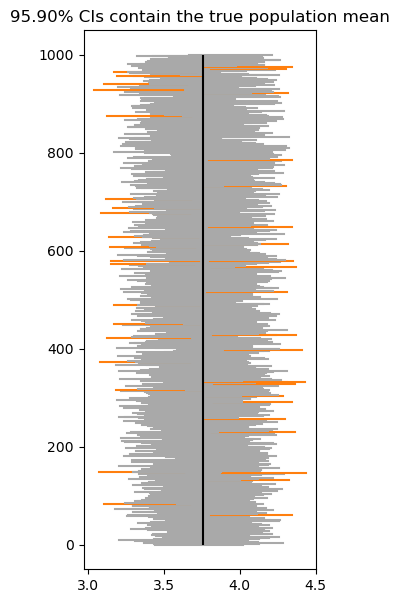

In [130]:
# Plotting the results
g = plt.figure(figsize=(3,7))
plt.title(f'{100*cis_with_popmean:.2f}% CIs contain the true population mean')
for i, interval in enumerate(conf_intervals):  # Plot first 50 intervals for clarity
    color = 'darkgray' if (interval[0] <= population_mean) and (interval[1] >= population_mean) else sns.color_palette()[1]
    plt.plot(tuple(interval), [i, i], color=color)
plt.vlines(x=population_mean, ymin=0, ymax=1000, color='black')
plt.show()